## Stil Transferi


Bu uygulamada TF Hub üzerinden stil transferi  modeli kullanılarak Ghibli stili gibi stillerin görsellere aktarılması amacıyla bu uygulama oluşturulmuştur

Kütüphanelerin import edilmesi

In [1]:
import tensorflow as tf
import tensorflow_hub as hub


In [2]:
from PIL import Image
import numpy as np


Modelin yüklenmesi ve fonksiyonların tanımlanması

In [3]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")


In [4]:
def load_image(image_path,max_dim):
  img= Image.open(image_path).convert('RGB')
  img.thumbnail((max_dim,max_dim))
  arr=np.array(img)/255.0
  return tf.expand_dims(arr.astype(np.float32),axis=0)


In [10]:
def stylize(content_path,style_path,content_max=512,style_max=256):
  content=load_image(content_path,content_max)
  style=load_image(style_path,style_max)
  outputs=model(tf.constant(content),tf.constant(style))
  stylized=outputs[0][0].numpy()
  stylized=(stylized*255).clip(0,255).astype(np.uint8)
  return Image.fromarray(stylized)


# İçerik dosyasının yüklenmesi

In [11]:
from google.colab import files
print('lütfen içerik dosyasını yükleyin')
uploaded=files.upload()
content_path=list(uploaded.keys())[0]



lütfen içerik dosyasını yükleyin


Saving normal.jpeg to normal.jpeg


In [12]:
print('lütfen stil dosyasını yükleyin')
uploaded=files.upload()
style_path=list(uploaded.keys())[0]

lütfen stil dosyasını yükleyin


Saving ghibli.jpeg to ghibli.jpeg


# Stil transfer işlemi

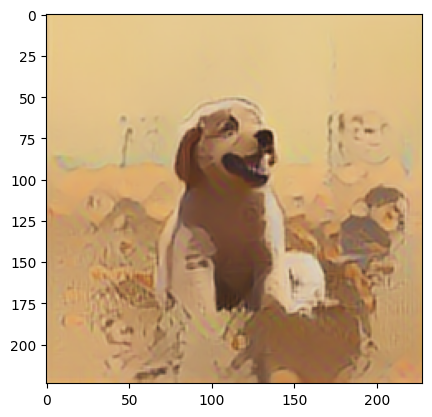

In [13]:
import matplotlib.pyplot as plt
result=stylize(content_path,style_path)
plt.imshow(result)

# İçeriği kaydet ve indir

In [14]:
result.save('result.jpg')
files.download('result.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>